### **TEAM 6th SENSE**

RANDOM DATA GENERATION FOR IMAGINARY CLASSES P1, P2 AND P3

In [4]:
import pandas as pd
from datetime import datetime, timedelta
from random import randint

def generate_product_data(product_id, date_range, initial_inventory):
    data = {
        'Date': date_range,
        'Product_ID': [product_id] * len(date_range),
        'Demand': [randint(5, 200) for _ in range(len(date_range))]
    }
    inventory = [max(0, initial_inventory - sum(data['Demand'][:i+1])) for i in range(len(date_range))]
    data['Inventory'] = inventory
    return pd.DataFrame(data)

start_date = datetime(2023, 6, 1)
end_date = datetime(2023, 7, 31)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

initial_inventory_p1 = 10000
df_p1 = generate_product_data('P1', date_range, initial_inventory_p1)

initial_inventory_p2 = 4000
df_p2 = generate_product_data('P2', date_range, initial_inventory_p2)

initial_inventory_p3 = 7000
df_p3 = generate_product_data('P3', date_range, initial_inventory_p3)

df_combined = pd.concat([df_p1, df_p2, df_p3])

df_combined.to_csv('product_data3.csv', index=False)

print(df_combined)


         Date Product_ID  Demand  Inventory
0  2023-06-01         P1     107       9893
1  2023-06-02         P1     141       9752
2  2023-06-03         P1      59       9693
3  2023-06-04         P1     117       9576
4  2023-06-05         P1     112       9464
..        ...        ...     ...        ...
56 2023-07-27         P3      58        980
57 2023-07-28         P3     100        880
58 2023-07-29         P3     123        757
59 2023-07-30         P3      84        673
60 2023-07-31         P3      38        635

[183 rows x 4 columns]


In [5]:
data = pd.read_csv("product_data3.csv")
#data = data.drop(columns=['Unnamed: 0'])
print(data.head())

         Date Product_ID  Demand  Inventory
0  2023-06-01         P1     107       9893
1  2023-06-02         P1     141       9752
2  2023-06-03         P1      59       9693
3  2023-06-04         P1     117       9576
4  2023-06-05         P1     112       9464


DEMAND PLOTS OVER THE PERIOD

In [6]:
import plotly.express as px


fig_demand_p1 = px.line(data[data['Product_ID'] == 'P1'], x='Date', y='Demand', title='Demand Over Time - Product P1')

fig_demand_p2 = px.line(data[data['Product_ID'] == 'P2'], x='Date', y='Demand', title='Demand Over Time - Product P2')

fig_demand_p3 = px.line(data[data['Product_ID'] == 'P3'], x='Date', y='Demand', title='Demand Over Time - Product P3')
fig_demand_p1.show()
fig_demand_p2.show()
fig_demand_p3.show()


INVENTORY PLOTS OVER THE PERIOD

In [7]:
import plotly.express as px

fig_inventory_p1 = px.line(data[data['Product_ID'] == 'P1'], x='Date', y='Inventory', title='Inventory Over Time - Product P1')

fig_inventory_p2 = px.line(data[data['Product_ID'] == 'P2'], x='Date', y='Inventory', title='Inventory Over Time - Product P2')

fig_inventory_p3 = px.line(data[data['Product_ID'] == 'P3'], x='Date', y='Inventory', title='Inventory Over Time - Product P3')

fig_inventory_p1.show()
fig_inventory_p2.show()
fig_inventory_p3.show()


ACF AND PACF PLOTS

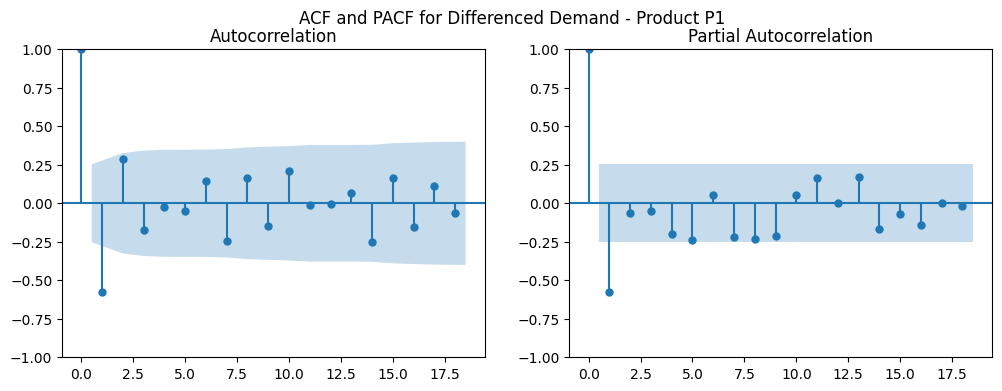

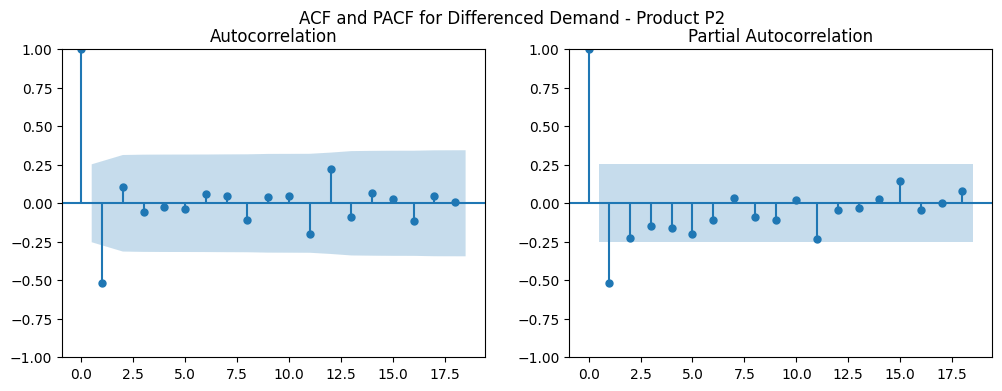

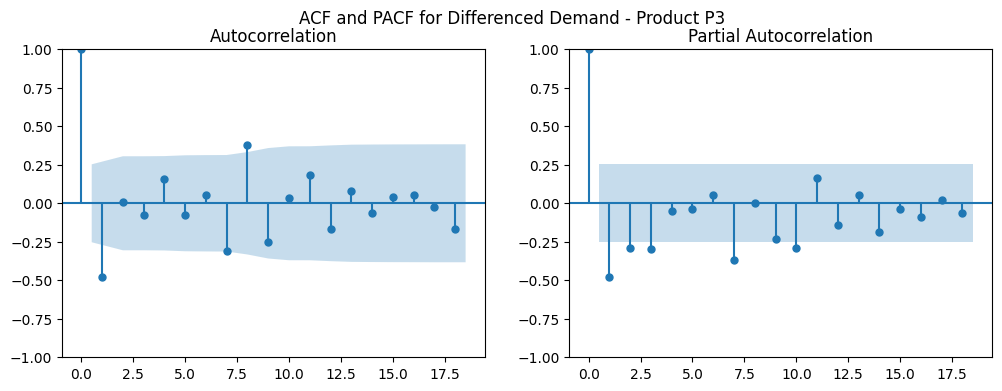

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

for product_id in data['Product_ID'].unique():
    product_data = data[data['Product_ID'] == product_id]

    time_series = product_data.set_index('Date')['Demand']

    differenced_series = time_series.diff().dropna()
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'ACF and PACF for Differenced Demand - Product {product_id}')

    plot_acf(differenced_series, ax=axes[0])
    plot_pacf(differenced_series, ax=axes[1])

    plt.show()

PREDICTING FUTURE 5 DEMAND STEPS

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for product_id in data['Product_ID'].unique():
    product_data = data[data['Product_ID'] == product_id]

    time_series = product_data.set_index('Date')['Demand']

    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 2)

    model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=True)

    future_steps = 5
    predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
    predictions = predictions.astype(int)

    print(f'Product {product_id} - Predicted Demand for the Next {future_steps} Steps:')
    print(predictions)
    print()

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Product P1 - Predicted Demand for the Next 5 Steps:
2023-08-01    110
2023-08-02     69
2023-08-03    112
2023-08-04     81
2023-08-05    112
Freq: D, Name: predicted_mean, dtype: int32

Product P2 - Predicted Demand for the Next 5 Steps:
2023-08-01    109
2023-08-02     72
2023-08-03    103
2023-08-04     73
2023-08-05    103
Freq: D, Name: predicted_mean, dtype: int32

Product P3 - Predicted Demand for the Next 5 Steps:
2023-08-01    70
2023-08-02    59
2023-08-03    70
2023-08-04    55
2023-08-05    68
Freq: D, Name: predicted_mean, dtype: int32



f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimal Order Quantity, Reorder Point, Safety Stock & Total Cost

In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import requests

def calculate_inventory_metrics_with_remaining(data, product_id, initial_inventory):
    product_data = data[data['Product_ID'] == product_id]

    time_series = product_data.set_index('Date')['Demand']

    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 2)

    model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=True)

    future_steps = 5
    predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
    predictions = predictions.astype(int)

    future_dates = pd.date_range(start=time_series.index[-1] + pd.DateOffset(days=1), periods=future_steps, freq='D')
    forecasted_demand = pd.Series(predictions, index=future_dates)
    lead_time = 1
    service_level = 0.95
    z = np.abs(np.percentile(forecasted_demand, 100 * (1 - service_level)))
    order_quantity = np.ceil(forecasted_demand.mean() + z).astype(int)
    reorder_point = forecasted_demand.mean() * lead_time + z
    safety_stock = reorder_point - forecasted_demand.mean() * lead_time
    holding_cost = 20
    stockout_cost = 70
    total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity)
    total_stockout_cost = stockout_cost * np.maximum(0, forecasted_demand.mean() * lead_time - initial_inventory)
    total_cost = total_holding_cost + total_stockout_cost

    remaining_inventory = max(0, initial_inventory - sum(forecasted_demand))

    # Desired output in dictionary form
    inventory_metrics = {
        f'Product {product_id}': {
            'Product': product_sku_dict[product_id[1]][1],
            'sku': product_sku_dict[product_id[1]][0],
            'Optimal Order Quantity': order_quantity,
            'Reorder Point': reorder_point,
            'Safety Stock': safety_stock,
            'Total Cost': total_cost,
            'Remaining Inventory Stock': remaining_inventory
        },
    }

    # Print the formatted output
    print(f'Inventory Metrics for Product {product_id}:')
    for key, value in inventory_metrics[f'Product {product_id}'].items():
        print(f"{key}: {value}")
    print()


    # Your Django API endpoint URL
    api_url = "http://127.0.0.1:8000/api/inventory_metrics/"

    # Make an HTTP POST request to the API endpoint
    response = requests.post(api_url, json=inventory_metrics)

    # Check the response status
    if response.status_code == 200:
        print("Inventory metrics data successfully posted to the API.")
    else:
        print(f"Failed to post inventory metrics data. Status code: {response.status_code}")
        print(response.text) 

# Product SKU dictionary
product_sku_dict = {
    '1': ['772559868266', 'Medicine'],
    '2': ['566540807600', 'Fertilizer'],
    '3': ['357685595552', 'Maize'],
}

# Initial inventory dictionary
initial_inventory_dict = {'P1': 10000, 'P2': 4000, 'P3': 7000}

# Calculate and print inventory metrics for each product
for product_id, initial_inventory in initial_inventory_dict.items():
    calculate_inventory_metrics_with_remaining(data, product_id, initial_inventory)


f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Inventory Metrics for Product P1:
Product: Medicine
sku: 772559868266
Optimal Order Quantity: 169
Reorder Point: 168.2
Safety Stock: 71.39999999999999
Total Cost: 201690.0
Remaining Inventory Stock: 9516

Inventory Metrics for Product P2:
Product: Fertilizer
sku: 566540807600
Optimal Order Quantity: 165
Reorder Point: 164.2
Safety Stock: 72.19999999999999
Total Cost: 81650.0
Remaining Inventory Stock: 3540

Inventory Metrics for Product P3:
Product: Maize
sku: 357685595552
Optimal Order Quantity: 121
Reorder Point: 120.2
Safety Stock: 55.8
Total Cost: 141210.0
Remaining Inventory Stock: 6678



f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

f:\EXTERNAL HD\Documents\GitHub\w-stores\Stores-Management\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

